In [1]:
#importing required libraries
import pandas  as pd
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
import numpy as np
import sklearn 
from sklearn.linear_model import LinearRegression

In [2]:
#Loading the data Task->3
train_data = pd.read_csv('./data/Train.csv')
# test_data = pd.read_csv('./data/Test.csv')


In [5]:

train_data.head()
train_data.shape

(8523, 12)

In [54]:
test_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [6]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [55]:
#Handling the missing value ->7
#Creating hash map of item with it's weight 
new_data = train_data[['Item_Identifier','Item_Weight']]
new_data = new_data.drop_duplicates()
new_data = new_data.dropna()

items = new_data['Item_Identifier']
weight = new_data['Item_Weight']
weight_map = dict(zip(items,weight))
new_data.shape

(1555, 2)

In [56]:
#Creating the hash map of outlet size 
outlet = train_data[['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
outlet_details = outlet.drop_duplicates()

outlets = outlet_details['Outlet_Identifier']
outlet_size = outlet_details['Outlet_Size']
outlet_map = dict(zip(outlets,outlet_size))


In [94]:
#Replacing the missing values in item_weight
new_df = train_data['Item_Identifier']
len(new_df)
new_df
new_weight = []
for i in range (len(new_df)):
    try:
        new_weight.append((weight_map[new_df[i]]))
    except:
        new_weight.append(np.NaN)
        pass
len(new_weight)
item_weight = pd.Series(new_weight)
item_weight.shape

(8523,)

In [96]:
#Concating the new weights 

df = pd.concat([train_data,item_weight],axis=1)
df.drop(['Item_Weight'],axis=1,inplace = True)
# df.head(10)

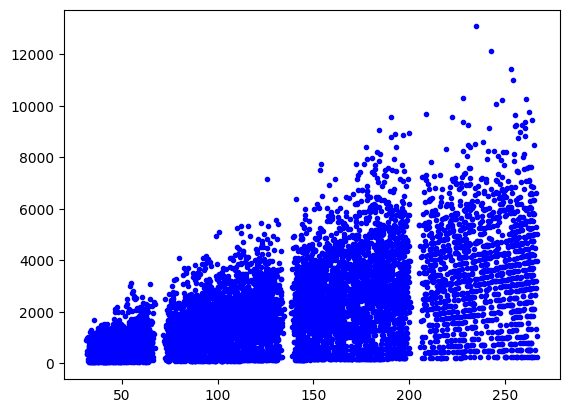

In [59]:
#Data Analysis 
#Scatter plot
plt.scatter(df['Item_MRP'],df['Item_Outlet_Sales'], color = 'Blue', marker = '.')
plt.show()


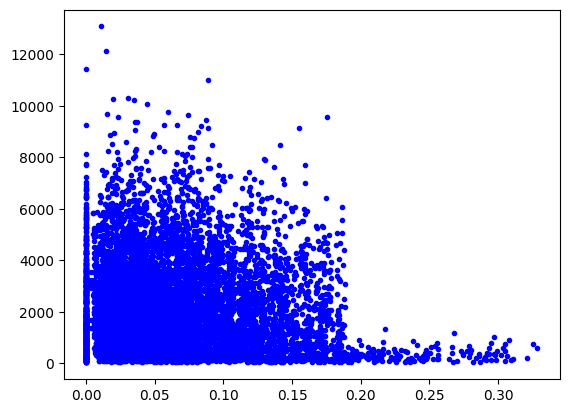

In [60]:
plt.scatter(df['Item_Visibility'],df['Item_Outlet_Sales'],color='Blue',marker = '.')
plt.show()

     -------------------------------------- 285.1/285.1 kB 3.5 MB/s eta 0:00:00


<AxesSubplot:xlabel='Item_Outlet_Sales'>

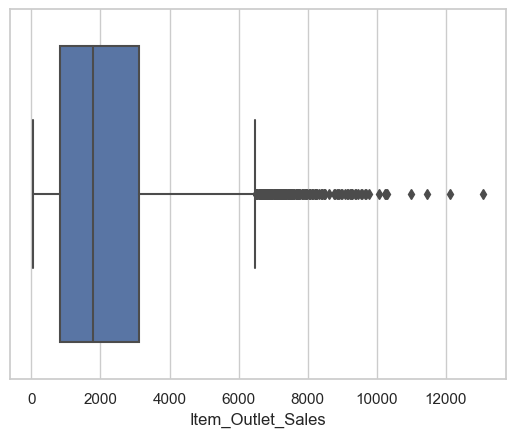

In [8]:
!pip install seaborn
import seaborn
 
# use to set style of background of plot
seaborn.set(style="whitegrid")
 
# loading data-set
# tip = seaborn.load_dataset("tips")
 
seaborn.boxplot(x = train_data['Item_Outlet_Sales'])

In [97]:
df.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
5,FDP36,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,10.395
6,FDO10,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,13.650
7,FDP10,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,19.000
8,FDH17,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,16.200
9,FDU28,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,19.200


In [100]:
#Label Encoding the values 
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

cols = df.columns
numeric_col = df._get_numeric_data().columns #Numerical Columns
cat_col = list(set(cols) - set(numeric_col))  #Categorical Columns
#Label Encoding the Categorical values
for item in cat_col:
        df[item]= label_encoder.fit_transform(df[item])

for item in cat_col:
    print(df[item].unique())


[1 2 3 0 4]
[ 156    8  662 ... 1323 1524 1519]
[0 2 1]
[ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
[9 3 0 1 5 7 2 8 6 4]
[1 2 0 3]
[1 3 0 2]


In [101]:
df.head(10)


,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
0,156,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,9.300
1,8,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,5.920
2,662,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,17.500
3,1121,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800,19.200
4,1297,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052,8.930
5,758,2,0.000000,0,51.4008,3,2009,1,2,2,556.6088,10.395
6,696,2,0.012741,13,57.6588,1,1987,0,2,1,343.5528,13.650
7,738,1,0.127470,13,107.7622,5,1985,1,2,3,4022.7636,19.000
8,440,2,0.016687,5,96.9726,7,2002,3,1,1,1076.5986,16.200
9,990,2,0.094450,5,187.8214,2,2007,3,1,1,4710.5350,19.200


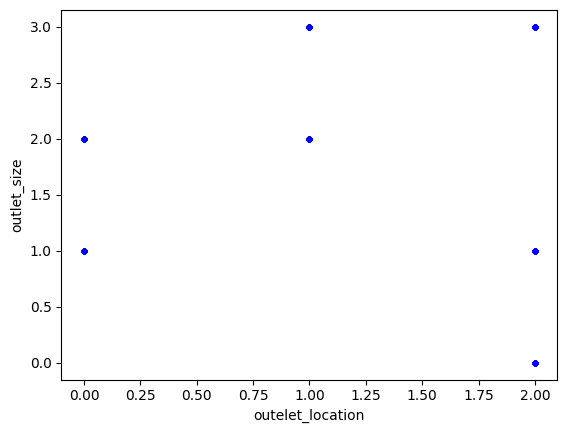

In [103]:
plt.scatter(df['Outlet_Location_Type'],df['Outlet_Size'],color='Blue',marker = '.')
plt.xlabel('outelet_location')
plt.ylabel('outlet_size')
plt.show()

In [64]:
# df.drop(['Outlet_Size'],axis=1,inplace=True)

In [65]:
df.dropna(inplace=True)

In [66]:
print(df.shape)
print(df.isnull().sum())

(8519, 11)
Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
0                            0
dtype: int64


In [68]:
#Creating a Report 
#creating the report of data frame 
profile = ProfileReport(df)
profile.to_file(output_file="report.html")

NameError: name 'ProfileReport' is not defined

In [69]:
df.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0
0,156,1,0.016047,4,249.8092,9,1999,0,1,3735.1380,9.300
1,8,2,0.019278,14,48.2692,3,2009,2,2,443.4228,5.920
2,662,1,0.016760,10,141.6180,9,1999,0,1,2097.2700,17.500
3,1121,2,0.000000,6,182.0950,0,1998,2,0,732.3800,19.200
4,1297,1,0.000000,9,53.8614,1,1987,2,1,994.7052,8.930
5,758,2,0.000000,0,51.4008,3,2009,2,2,556.6088,10.395
6,696,2,0.012741,13,57.6588,1,1987,2,1,343.5528,13.650
7,738,1,0.127470,13,107.7622,5,1985,2,3,4022.7636,19.000
8,440,2,0.016687,5,96.9726,7,2002,1,1,1076.5986,16.200
9,990,2,0.094450,5,187.8214,2,2007,1,1,4710.5350,19.200


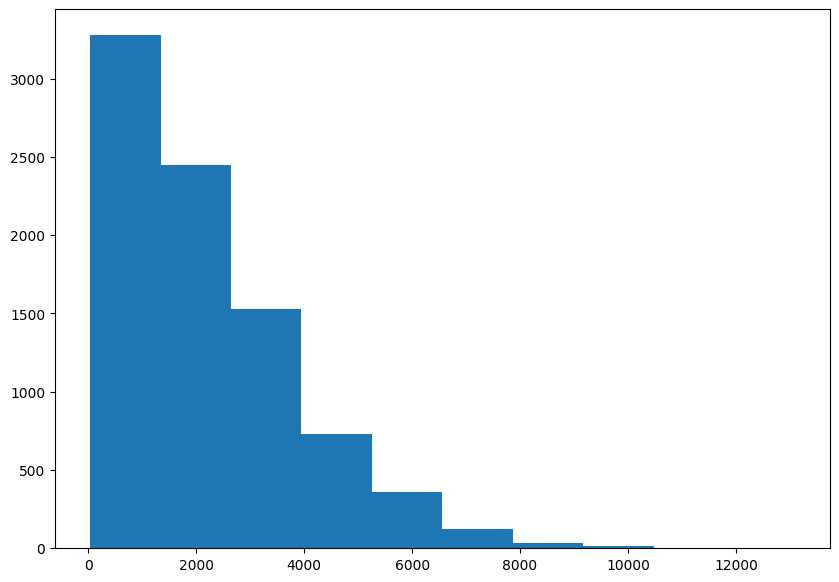

In [70]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Item_Outlet_Sales'])
 
# Show plot
plt.show()

In [77]:
X = df.iloc[:,0:9]
Y = df.iloc[:,9]
item_weight = df[0]




In [83]:
X = pd.concat([X,item_weight],axis=1)

In [84]:
#Creting the matrix array 
x, y = np.array(X), np.array(Y)

In [85]:
#Creating the model with Linear Regression
model = LinearRegression().fit(X, Y)

#using the training dataset for the prediction
pred = model.predict(X)

r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.5019025507048794
intercept: 6078.300893310132
coefficients: [-1.23448374e-02  3.50851007e+01 -1.72802582e+03 -1.29932991e+00
  1.55708647e+01  5.67088291e+01 -3.61220937e+00 -6.64677515e+01
  8.50046355e+02 -2.11189844e-01 -2.11189844e-01]


C:\Users\bhata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bhata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\bhata\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [86]:
print(pred[0:3])
print(Y[0:3])


[4103.96912649 1326.31621939 2400.60091958]
0    3735.1380
1     443.4228
2    2097.2700
Name: Item_Outlet_Sales, dtype: float64


In [87]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
display(r2)
# display(mse)

0.5019025507048794

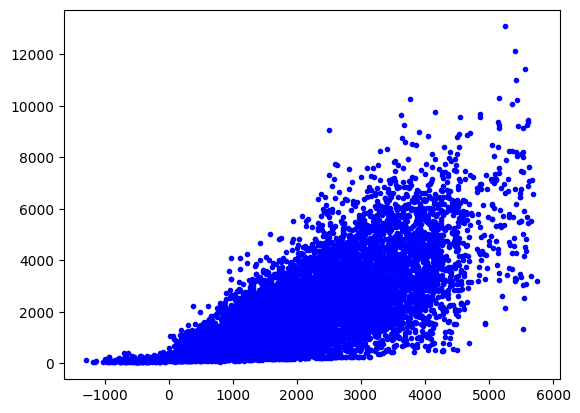

In [34]:
plt.scatter(pred,y, color = 'Blue', marker = '.')
plt.show()

1450379.213004524